In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from datetime import datetime as dt
from scipy import stats
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def Media(dataFrame, agrupadoPor, mediaDe) :
    media = dataFrame.groupby(dataFrame[agrupadoPor]).mean()
    df_media = pd.DataFrame(media[mediaDe])
    df_media.reset_index(inplace = True)
        
    return df_media

def SeparaAno(dataFrame, anoInicio, anoFim) :
    df_ano = dataFrame.loc[dataFrame['Date'].dt.year.between(anoInicio , anoFim , inclusive = True)]
    
    return df_ano

def SeparaMes2(dataFrame, mesInicio, mesFim) :
    df_mes = dataFrame.loc[dataFrame['Date'].dt.month.between(mesInicio , mesFim , inclusive = True)]
    
    return df_mes

def SeparaMes(dataFrame, mesInicio, mesFim) :
    df_mes = dataFrame.loc[dataFrame['data'].dt.month.between(mesInicio , mesFim , inclusive = True)]
    
    return df_mes

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

df_corona_brasil = pd.read_csv("Datasets/coronaBrasil.csv", sep = ';', usecols=['regiao', 'estado', 'municipio', 'data', 'semanaEpi', 'casosAcumulado', 'casosNovos', 'obitosAcumulado', 'obitosNovos'])
df_corona_brasil = df_corona_brasil.dropna()
df_corona_brasil['data'] =  pd.to_datetime(df_corona_brasil['data'], format = '%Y-%m-%d')

df_corona_mundo = pd.read_csv("Datasets/coronaMundo.csv", sep = ',', usecols=['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths'])
df_corona_mundo = df_corona_mundo.dropna()
df_corona_mundo['date'] =  pd.to_datetime(df_corona_mundo['date'], format = '%Y-%m-%d')

df_chinese = pd.read_csv("Datasets/chinese.csv", sep = ';')
df_english = pd.read_csv("Datasets/english.csv", sep = ';')
df_french = pd.read_csv("Datasets/french.csv", sep = ';')
df_german = pd.read_csv("Datasets/german.csv", sep = ';')
df_japanese = pd.read_csv("Datasets/japanese.csv", sep = ';')
df_portuguese = pd.read_csv("Datasets/portuguese.csv", sep = ';')
df_russian = pd.read_csv("Datasets/russian.csv", sep = ';')

df_chinese['Duration'] = df_chinese['Duration'].map(lambda x:x.split(' ')[0])
df_chinese['Duration'] = pd.to_numeric(df_chinese['Duration'] ,downcast = 'float')
df_chinese['Date'] =  pd.to_datetime(df_chinese['Date'], format = '%b %d, %Y, %H:%M')
df_chinese['Viewers'] = df_chinese['Viewers'].apply(lambda x: x*1000)
df_chinese['Viewers'] = df_chinese['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_english['Duration'] = df_english['Duration'].map(lambda x:x.split(' ')[0])
df_english['Duration'] = pd.to_numeric(df_english['Duration'] ,downcast = 'float')
df_english['Date'] =  pd.to_datetime(df_english['Date'], format = '%b %d, %Y, %H:%M')
df_english['Viewers'] = df_english['Viewers'].apply(lambda x: x*1000)
df_english['Viewers'] = df_english['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_french['Duration'] = df_french['Duration'].map(lambda x:x.split(' ')[0])
df_french['Duration'] = pd.to_numeric(df_french['Duration'] ,downcast = 'float')
df_french['Date'] =  pd.to_datetime(df_french['Date'], format = '%b %d, %Y, %H:%M')
df_french['Viewers'] = df_french['Viewers'].apply(lambda x: x*1000)
df_french['Viewers'] = df_french['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_german['Duration'] = df_german['Duration'].map(lambda x:x.split(' ')[0])
df_german['Duration'] = pd.to_numeric(df_german['Duration'] ,downcast = 'float')
df_german['Date'] =  pd.to_datetime(df_german['Date'], format = '%b %d, %Y, %H:%M')
df_german['Viewers'] = df_german['Viewers'].apply(lambda x: x*1000)
df_german['Viewers'] = df_german['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_japanese['Duration'] = df_japanese['Duration'].map(lambda x:x.split(' ')[0])
df_japanese['Duration'] = pd.to_numeric(df_japanese['Duration'] ,downcast = 'float')
df_japanese['Date'] =  pd.to_datetime(df_japanese['Date'], format = '%b %d, %Y, %H:%M')
df_japanese['Viewers'] = df_japanese['Viewers'].apply(lambda x: x*1000)
df_japanese['Viewers'] = df_japanese['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_portuguese['Duration'] = df_portuguese['Duration'].map(lambda x:x.split(' ')[0])
df_portuguese['Duration'] = pd.to_numeric(df_portuguese['Duration'] ,downcast = 'float')
df_portuguese['Date'] =  pd.to_datetime(df_portuguese['Date'], format = '%b %d, %Y, %H:%M')
df_portuguese['Viewers'] = df_portuguese['Viewers'].apply(lambda x: x*1000)
df_portuguese['Viewers'] = df_portuguese['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

df_russian['Duration'] = df_russian['Duration'].map(lambda x:x.split(' ')[0])
df_russian['Duration'] = pd.to_numeric(df_russian['Duration'] ,downcast = 'float')
df_russian['Date'] =  pd.to_datetime(df_russian['Date'], format = '%b %d, %Y, %H:%M')
df_russian['Viewers'] = df_russian['Viewers'].apply(lambda x: x*1000)
df_russian['Viewers'] = df_russian['Viewers'].apply(lambda x: x/1000 if x%1000==0 else x)

frame_world = [df_chinese, df_french, df_german, df_japanese, df_portuguese, df_russian]
df_world = pd.concat(frame_world)

In [20]:
z_score = pd.DataFrame(np.abs(stats.zscore(df_world['Viewers'])))

index_filtred = z_score[z_score[0] < 3].index

df_world_clean = df_world.iloc[index_filtred]

df_world_clean.describe()

Duration   Viewers
count 705261.00 705261.00
mean       5.51   1058.35
std        5.87   1728.39
min        0.10      0.00
25%        3.00    197.00
50%        4.50    446.00
75%        6.70   1100.00
max      757.00  13720.00

In [21]:
x = df_corona_mundo.loc[df_corona_mundo['date'].dt.month.between(4 , 9, inclusive = True)]
x = x.groupby(x['date'].dt.date).mean()
x.reset_index(inplace = True)
datas = x['date']
x = x['total_cases']

y = SeparaAno(df_world_clean, 2020, 2020)
y = SeparaMes2(y, 4, 9)
y = y.groupby(y['Date'].dt.date).mean()
y.reset_index(inplace = True)
y = y['Viewers']

In [22]:
df = pd.concat([x, y] , axis = 1)
corrMatrix = df.corr()
print (corrMatrix)

             total_cases  Viewers
total_cases         1.00    -0.36
Viewers            -0.36     1.00


Mean squared error:  57.808092957390166
Coefficient of determination (R2):  0.17022386475211904


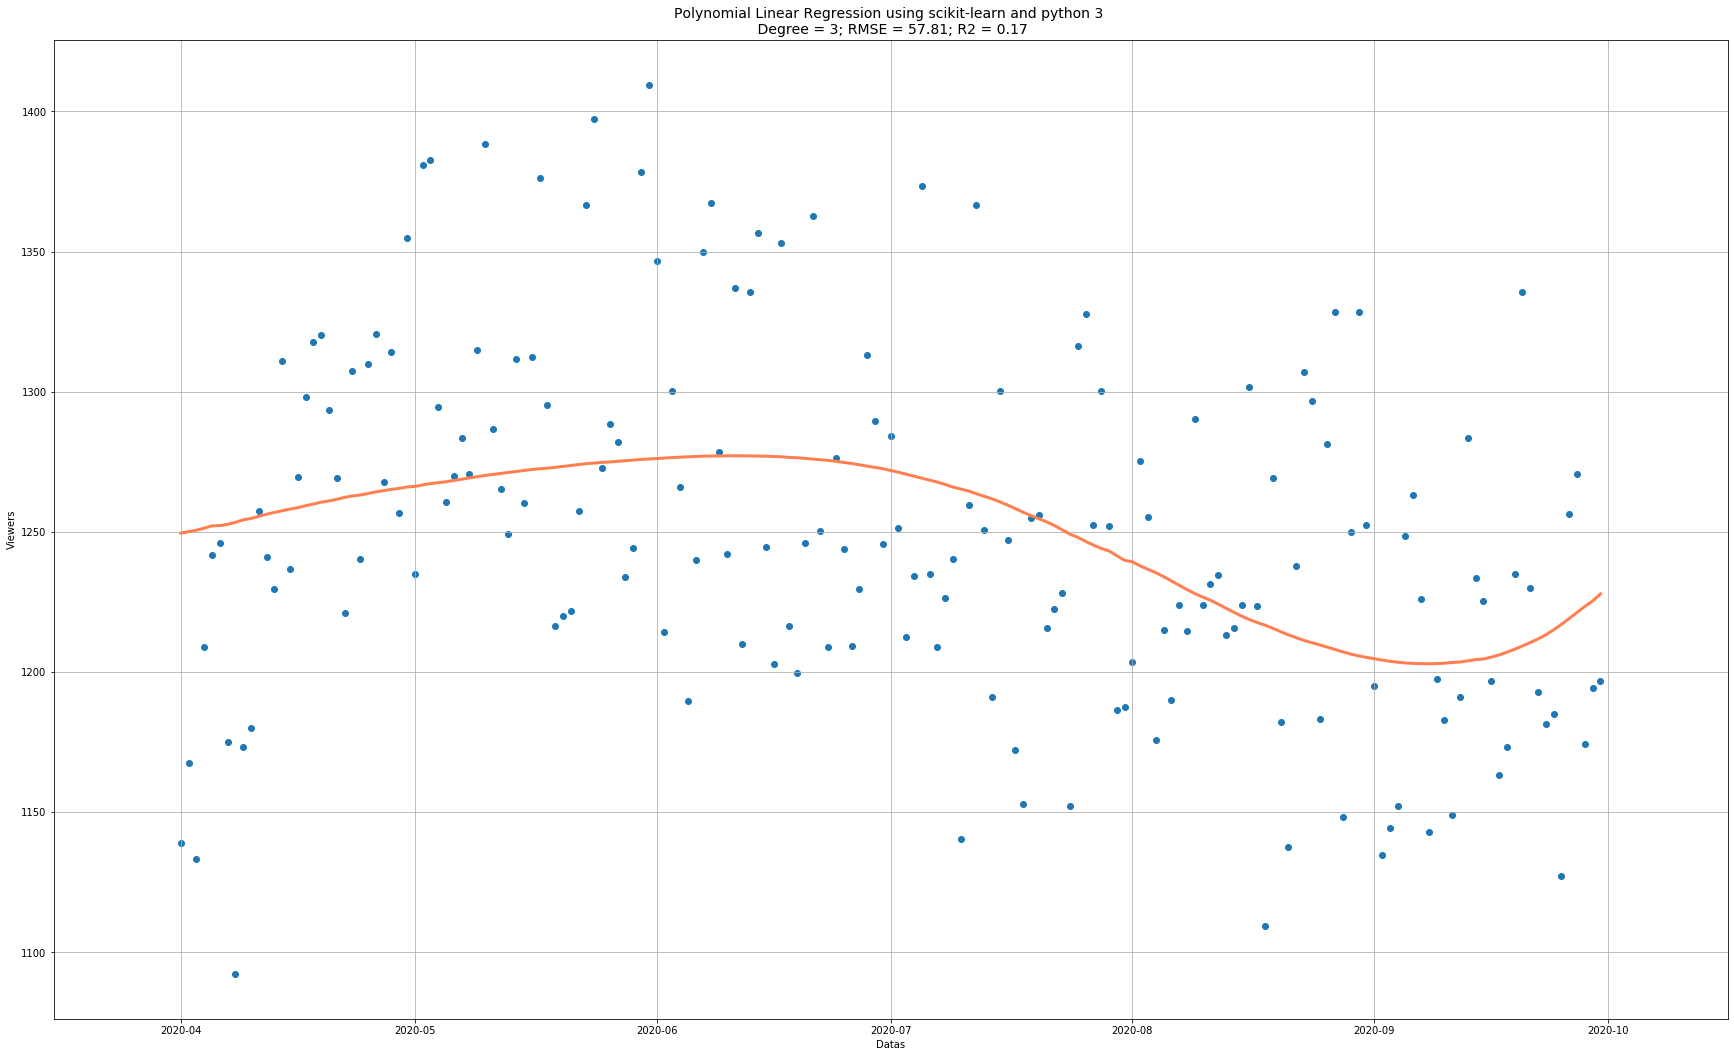

In [30]:
x1 = np.array(x).reshape((-1, 1))

nb_degree = 3
polynomial_features = PolynomialFeatures(degree = nb_degree)
x_transf = polynomial_features.fit_transform(x1)

model = LinearRegression()
model.fit(x_transf, y)

y_new = model.predict(x_transf)
rmse = np.sqrt(mean_squared_error(y,y_new))
r2 = r2_score(y,y_new)
print('Mean squared error: ', rmse)
print('Coefficient of determination (R2): ', r2)

fig = plt.figure(figsize = (30 , 18))
plt.scatter(datas,y)
plt.plot(datas, y_new, color='coral', linewidth=3)
plt.grid()
title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))
plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title, fontsize=14)
plt.xlabel('Datas')
plt.ylabel('Viewers')

# plt.savefig("Imagens/Regressao/polynomial_regression_mundo.png", bbox_inches='tight')
plt.show()